<a href="https://colab.research.google.com/github/kelvinfoo123/Machine-Learning-Projects/blob/main/Market_Segmentation_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import data and basic libraries**

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [45]:
data = pd.read_csv("marketing_campaign.csv", sep = "\t")
data.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [ ]:
data.shape

(2240, 29)

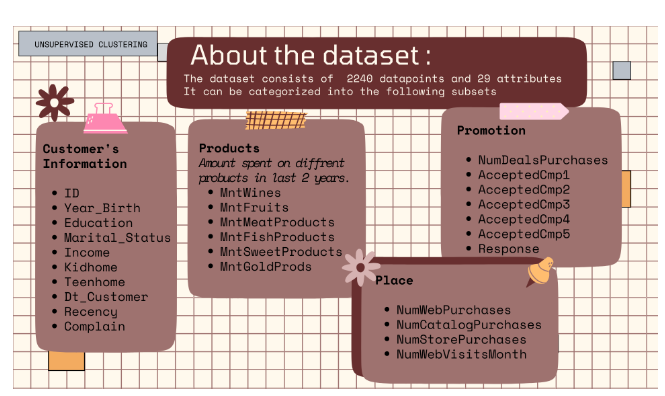

**Data Exploration**

In [ ]:
data.info() # There are null values in income. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [46]:
# Drop null values in data 
data = data.dropna()
data.shape 

(2216, 29)

In [ ]:
# Number of people in each marital status category 
data["Marital_Status"].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [ ]:
# Number of people in each education category 
data["Education"].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

**Data Engineering**

In [47]:
# New column for age of customer 
data["Age"] = 2022 - data["Year_Birth"]

In [48]:
# New column for total spending 
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

In [49]:
# New column for total number of children living in the household 
data["Children"] = data["Kidhome"] + data["Teenhome"]

In [50]:
# New column for living condition 
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

In [51]:
# New column for total number of members in household 
data["Family Size"] = data["Living_With"].replace({'Alone': 1, 'Partner':2}) + data['Children']

In [52]:
# New column for parenthood 
data["Is_parent"] = np.where(data["Children"] > 0, 1, 0)

In [53]:
# Generalize education level 
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [54]:
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

In [55]:
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

In [56]:
data.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Children,Family Size,Is_parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.073105,0.064079,0.013538,0.009477,0.150271,53.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.260367,0.244950,0.115588,0.096907,0.357417,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,52.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,129.000000,2525.000000,3.000000,5.000000,1.000000


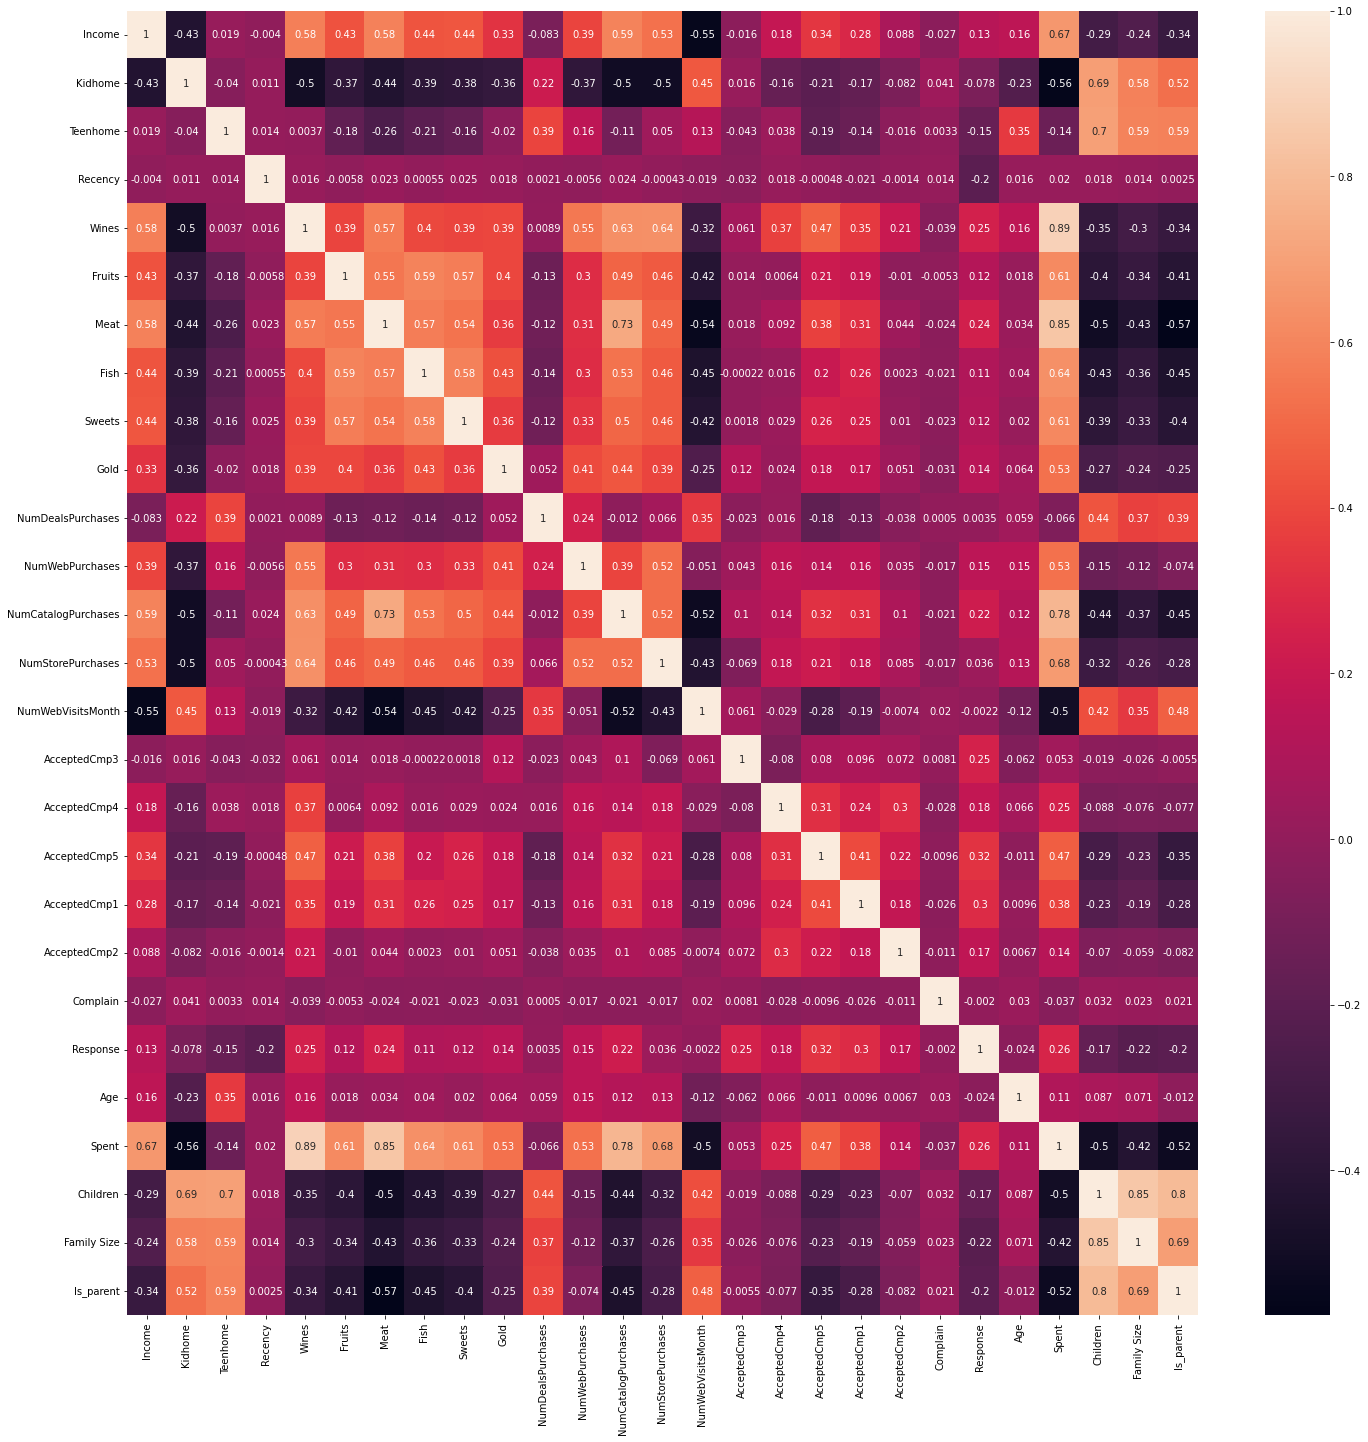

In [57]:
# Correlation matrix 
plt.figure(figsize = (24,24))
sns.heatmap(data.corr(), annot = True)

**Data Preprocessing**

In [58]:
# Remove outliers 

data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]

In [59]:
# Label Encoder 
# There are two categorical variables of concern: Education and Living_With 

import sklearn 
from sklearn.preprocessing import LabelEncoder 
encoder = LabelEncoder()

data["Education"] = encoder.fit_transform(data["Education"])
data["Living_With"] = encoder.fit_transform(data["Living_With"])

In [60]:
duplicate = data.copy()

# Columns to delete from duplicate 
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
duplicate = duplicate.drop(cols_del, axis = 1) 

In [61]:
# Scaling 
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaled_duplicate = scaler.fit_transform(duplicate)

**Dimension Reduction using PCA**

There are many features in this dataset, making it harder to cluster. Many of these features are correlated and thus, redundant. We thus perform dimension reduction. 

In [62]:
from sklearn.decomposition import PCA 

pca = PCA(n_components = 3) # Reduce number of dimensions to 3 
pca_transformed = pca.fit_transform(scaled_duplicate)
pca_transformed = pd.DataFrame(pca_transformed, columns = (["col 1", "col 2", "col 3"]))

**Clustering**

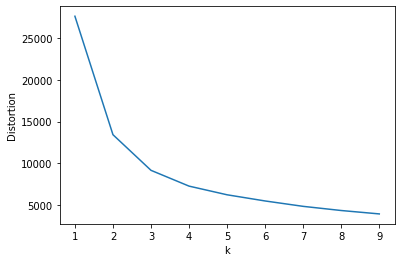

In [63]:
from sklearn.cluster import KMeans 

# Elbow method to determine optimal number of clusters 
distortions = []
for k in range(1,10): 
  model = KMeans(n_clusters = k)
  model.fit(pca_transformed)
  distortions.append(model.inertia_)

plt.plot(range(1,10), distortions)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.show()

With the K-Means clustering, optimal number of clusters = 2. 

In [64]:
# Cluster by Agglomerative Clustering (ie. hierarchial clustering)
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters = 2)
ac_predict = ac.fit_predict(pca_transformed)
pca_transformed["Clusters"] = ac_predict 

# Add cluster feature to original data 
data["Clusters"] = ac_predict

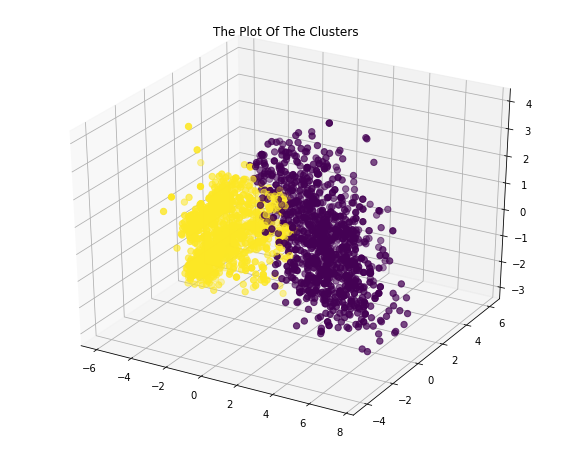

In [65]:
x = pca_transformed["col 1"]
y = pca_transformed["col 2"]
z = pca_transformed["col 3"]

fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c= pca_transformed["Clusters"], marker='o')
ax.set_title("The Plot Of The Clusters")
plt.show()

**Evaluation of clusters**

In [66]:
# Distribution of clusters 
data["Clusters"].value_counts()

1    1192
0    1020
Name: Clusters, dtype: int64

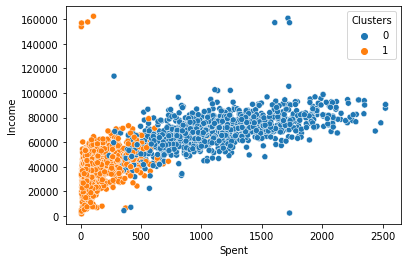

In [67]:
# Profile based on spending and income 
sns.scatterplot(x = data["Spent"], y = data["Income"], hue = data["Clusters"])



*   Cluster 0: low spending
*   Cluster 1: high spending 



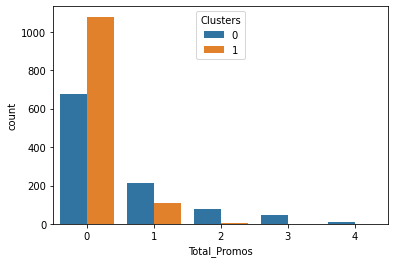

In [68]:
# Acceptance of past promotions 
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]

sns.countplot(x = data["Total_Promos"], hue = data["Clusters"], data = data)